# Startup Data Analysis
### Case Study Part-II
#### Part of ML Course by Coding Ninjas

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
data=pd.read_csv("startup_funding.csv")

In [58]:
data.shape

(2372, 10)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


## Task 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. 

NCR include Gurgaon, Noida and New Delhi.
***Find the location where the most number of funding is done*** . That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.

Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [60]:
data['CityLocation']=data['CityLocation'].str.lower()
data['CityLocation']=data['CityLocation'].str.replace(" new delhi","delhi")
data['CityLocation']=data['CityLocation'].str.replace("delhi","new delhi")
data['CityLocation']=data['CityLocation'].str.capitalize()

In [61]:
grp_data_location=data.groupby("CityLocation").count()['SNo'].sort_values(ascending=False)[:8]
grp_data_location

CityLocation
Bangalore        628
Mumbai           446
New new delhi    381
Gurgaon          240
Pune              84
Noida             78
Hyderabad         76
Chennai           66
Name: SNo, dtype: int64

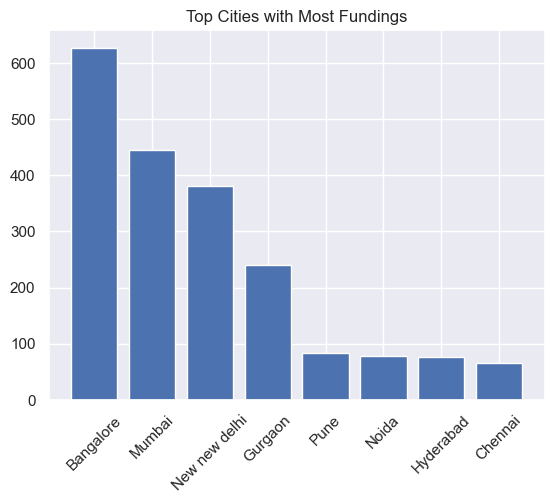

In [62]:
plt.bar(grp_data_location.index,grp_data_location)
plt.title("Top Cities with Most Fundings")
plt.ylabel("Number of Fundings")
plt.xticks(rotation=45)
plt.show()

#### Bangalore is the city with most number of fundings.


### So, Bangalore would be the perfect location where getting the investment has a high chance.

# ________________________________________

# Task 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. 

***Find the top 5 investors who have invested maximum number of times*** (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.


In [63]:
data['InvestorsName'].head(10)

0                                          Kae Capital
1                           Triton Investment Advisors
2    Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3    Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                       Narottam Thudi, Shireesh Palle
5             Reliance Corporate Advisory Services Ltd
6                                 Infuse Ventures, JLL
7      Asset Management (Asia) Ltd, Digital Garage Inc
8        Kalaari Capital, Nexus India Capital Advisors
9    International Finance Corporation, Rocketship,...
Name: InvestorsName, dtype: object

In [64]:
names=data['InvestorsName'].str.split(', ').to_list()
investors_names=[]
for i in names:
    if type(i)==list:
        for x in i:
            investors_names.append(x)
investors_names_s=pd.Series(investors_names)

In [65]:
investors_names_s.value_counts()[:5]

Sequoia Capital         62
Accel Partners          52
Kalaari Capital         43
Indian Angel Network    39
Blume Ventures          38
Name: count, dtype: int64

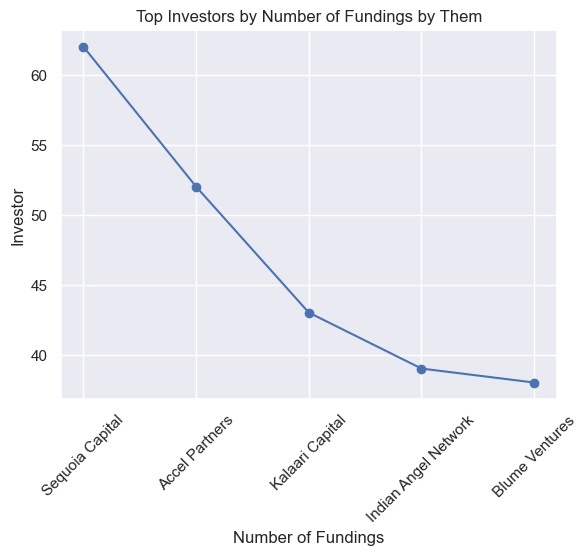

In [66]:
grp_data_investor=investors_names_s.value_counts()[:5]
plt.plot(grp_data_investor.index,grp_data_investor,marker='o')
plt.title("Top Investors by Number of Fundings by Them")
plt.xlabel("Number of Fundings")
plt.ylabel("Investor")
plt.xticks(rotation=45)
plt.show()

## Here are some Investors with most number of fundings.

> Sequoia Capital

> Accel Partners

> Kalaari Capital

> Indian Angel Network

> Blume Ventures

#### This information will increase the chance of my friend startup getting some initial investment by contacting these investors

# ________________________________________

# Task 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup.

***Find the top 5 investors who have invested maximum number of times in different companies.*** That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [67]:
data['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
data['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
data['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
data['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
data['StartupName'].replace("Olacabs", "Ola", inplace = True)
data['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
data['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
data['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [68]:
investors_df = data['InvestorsName'].str.split(', ', expand=True)
inv_data=pd.concat([data['StartupName'],investors_df],axis=1)
inv_data.head()

,StartupName,0,1,2,3,4,5,6,7,8,9
0,TouchKin,Kae Capital,None,None,None,None,None,None,None,None,None
1,Ethinos,Triton Investment Advisors,None,None,None,None,None,None,None,None,None
2,Leverage Edu,Kashyap Deorah,Anand Sankeshwar,Deepak Jain,Sadashiva NT,Arjun Mehta,Satish Kaul,Anindya Ghose,None,None,None
3,Zepo,Kunal Shah,LetsVenture,Anupam Mittal,Hetal Sonpal,None,None,None,None,None,None
4,Click2Clinic,Narottam Thudi,Shireesh Palle,None,None,None,None,None,None,None,None


In [69]:
investors_list=list(investors_names_s.unique())

In [74]:
investor_dict={}
for i in range(inv_data.shape[0]):
    for x in range(1,inv_data.shape[1]):
        if inv_data.iloc[i,x] not in investor_dict.keys():
            investor_dict[inv_data.iloc[i,x]]=[inv_data.iloc[i,0]]
        else:
            if inv_data.iloc[i,0] not in investor_dict[inv_data.iloc[i,x]]:
                investor_dict[inv_data.iloc[i,x]].append(inv_data.iloc[i,0])
del investor_dict[None]

In [80]:
len(investor_dict)

2578

In [81]:
investor_count_dict={}
for  i in investor_dict.keys():
    investor_count_dict[i]=len(investor_dict[i])

In [86]:
pd.Series(investor_count_dict).sort_values(ascending=False)[:5]

Accel Partners          47
Sequoia Capital         47
Kalaari Capital         40
Indian Angel Network    39
Blume Ventures          35
dtype: int64

## Here are top 5 investors who have invested maximum number of times in different companies

> Accel Partners

> Sequoia Capital

> Kalaari Capital

> Indian Angel Network

> Blume Ventures

#### Approaching these investors will be beneficial for my friend as these invesetors invests in different businesses.

# _________________________________________


# Task 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. 


***Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding***. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [87]:
data['InvestmentType'].value_counts()

InvestmentType
Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: count, dtype: int64

In [88]:
data['InvestmentType']=data['InvestmentType'].str.replace("SeedFunding","Seed Funding")
data['InvestmentType']=data['InvestmentType'].str.replace("PrivateEquity","Private Equity")
data['InvestmentType']=data['InvestmentType'].str.replace("Crowd funding","Crowd Funding")

In [89]:
data['InvestmentType'].value_counts()

InvestmentType
Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: count, dtype: int64

In [90]:
# Selecting data with seed funding and crowd funding

seed_crowd_data=data[data['InvestmentType'].isin(["Seed Funding","Crowd Funding"])]

In [91]:
seed_crowd_data.shape

(1303, 10)

In [93]:
# Getting Investor names investing in different startups
# Same as Task 3

names=seed_crowd_data['InvestorsName'].str.split(', ').to_list()
investors_names=[]
for i in names:
    if type(i)==list:
        for x in i:
            investors_names.append(x)
investors_names_s=pd.Series(investors_names)
investors_list=list(investors_names_s.unique())


investors_df = seed_crowd_data['InvestorsName'].str.split(', ', expand=True)
inv_data=pd.concat([seed_crowd_data['StartupName'],investors_df],axis=1)


investor_dict={}
for i in range(inv_data.shape[0]):
    for x in range(1,inv_data.shape[1]):
        if inv_data.iloc[i,x] not in investor_dict.keys():
            investor_dict[inv_data.iloc[i,x]]=[inv_data.iloc[i,0]]
        else:
            if inv_data.iloc[i,0] not in investor_dict[inv_data.iloc[i,x]]:
                investor_dict[inv_data.iloc[i,x]].append(inv_data.iloc[i,0])
del investor_dict[None]


investor_count_dict={}
for  i in investor_dict.keys():
    investor_count_dict[i]=len(investor_dict[i])
    

pd.Series(investor_count_dict).sort_values(ascending=False)[:7]

Indian Angel Network     32
Undisclosed Investors    27
Undisclosed investors    24
Rajan Anandan            21
LetsVenture              16
Anupam Mittal            16
Kunal Shah               14
dtype: int64

## Here are top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding


> Indian Angel Network

> Rajan Anandan

> LetsVenture

> Anupam Mittal

> Kunal Shah

#### Approaching these investors will be beneficial for my friend as these invesetors invests in different businesses.

# _________________________________________


# Task 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. 

***Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity***. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [95]:
# Selecting data with Private Equity

seed_crowd_data=data[data['InvestmentType'].isin(["Private Equity"])]

seed_crowd_data.shape

# Getting Investor names investing in different startups
# Same as Task 3

names=seed_crowd_data['InvestorsName'].str.split(', ').to_list()
investors_names=[]
for i in names:
    if type(i)==list:
        for x in i:
            investors_names.append(x)
investors_names_s=pd.Series(investors_names)
investors_list=list(investors_names_s.unique())


investors_df = seed_crowd_data['InvestorsName'].str.split(', ', expand=True)
inv_data=pd.concat([seed_crowd_data['StartupName'],investors_df],axis=1)


investor_dict={}
for i in range(inv_data.shape[0]):
    for x in range(1,inv_data.shape[1]):
        if inv_data.iloc[i,x] not in investor_dict.keys():
            investor_dict[inv_data.iloc[i,x]]=[inv_data.iloc[i,0]]
        else:
            if inv_data.iloc[i,0] not in investor_dict[inv_data.iloc[i,x]]:
                investor_dict[inv_data.iloc[i,x]].append(inv_data.iloc[i,0])
del investor_dict[None]


investor_count_dict={}
for  i in investor_dict.keys():
    investor_count_dict[i]=len(investor_dict[i])
    

pd.Series(investor_count_dict).sort_values(ascending=False)[:5]

Sequoia Capital    44
Accel Partners     42
Kalaari Capital    34
Blume Ventures     27
Tiger Global       21
dtype: int64

## Here are top 5 investors who have invested in a different number of startups and their investment type is Private Equity


> Sequoia Capital

> Accel Partners

> Kalaari Capital

> Blume Ventures

> Tiger Global



#### Approaching these investors will be beneficial for my friend as these invesetors invests in different businesses.

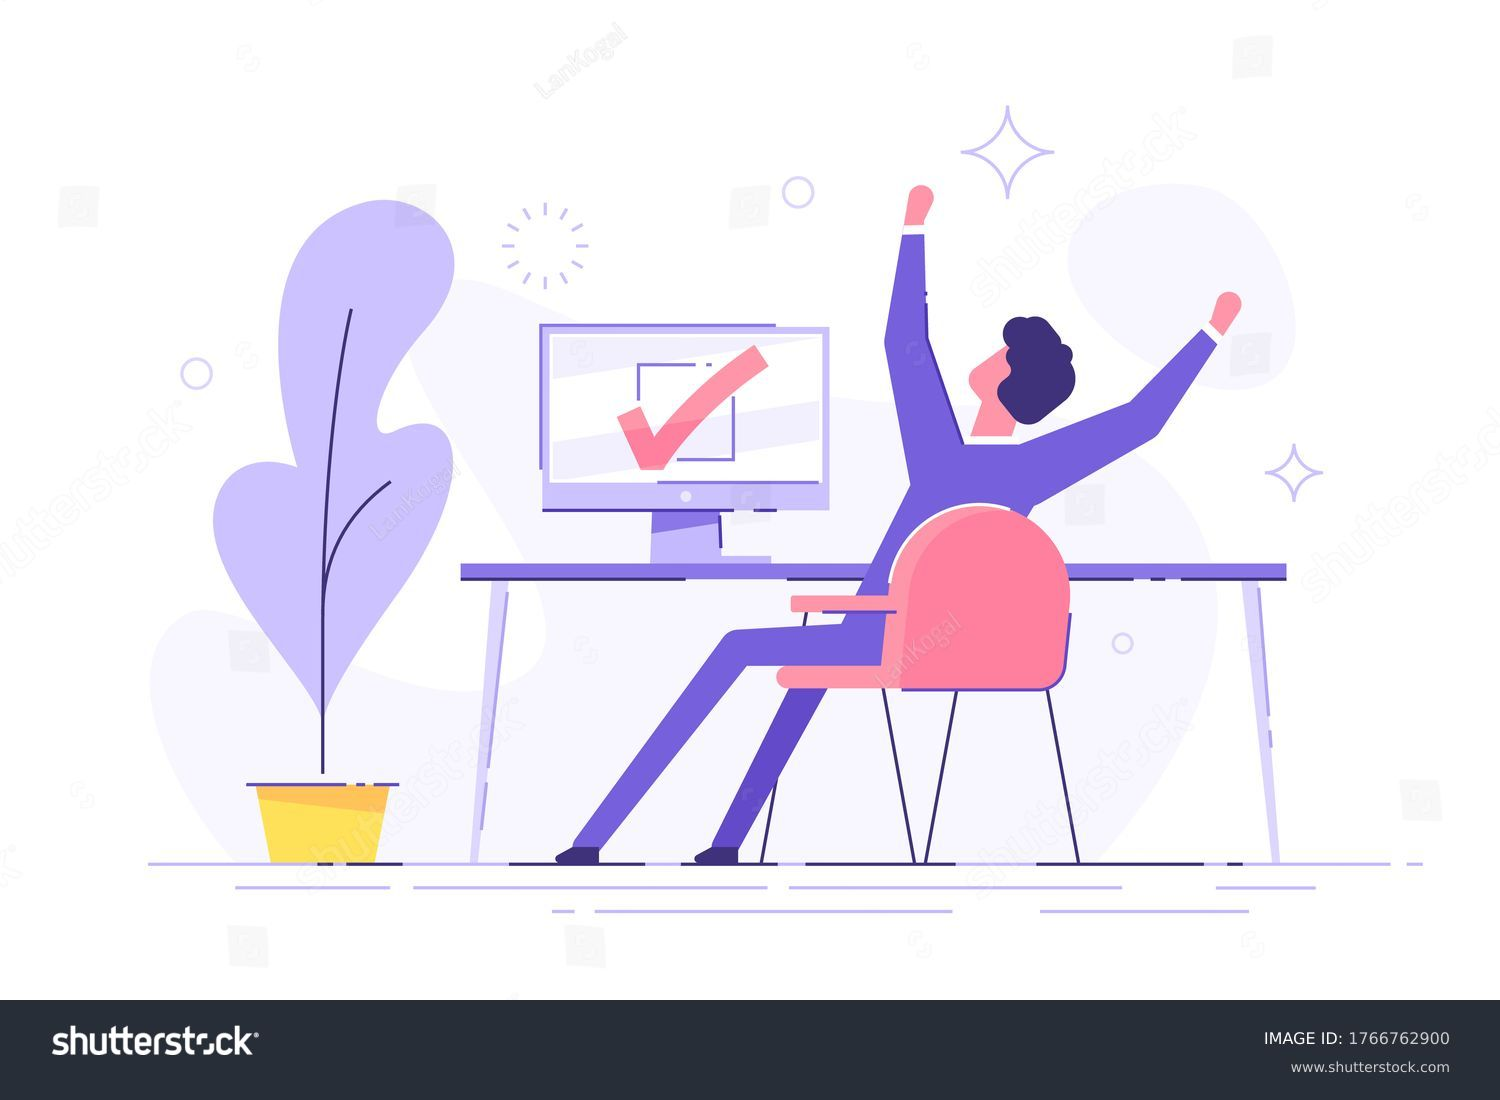

# Completed all tasks of the case study (Part-II) as a part of Coding Ninjas ML Course